In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [63]:
# Make the dataset

X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=2.5)

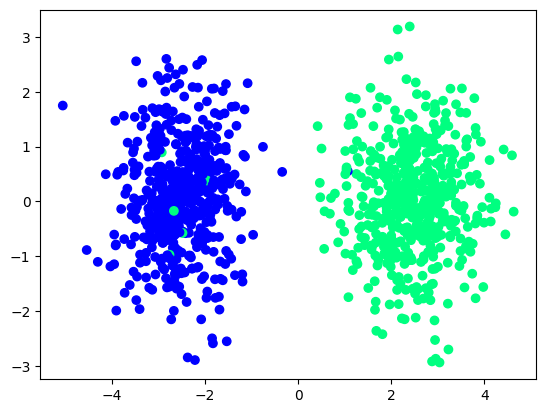

In [64]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter")
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
def step(z):

    return np.where(z > 0, 1, 0)

In [67]:
class Percpetron_trick():

    def __init__(self, learning_rate, epochs):
        self.coef_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)
        self.coef_ = np.random.randn(X_train.shape[1]) * 0.01

        for i in range(self.epochs):

            idx = np.random.randint(1, X_train.shape[0])

            y_pred = step(np.dot(X_train[idx], self.coef_))

            error = y_train[idx] - y_pred

            self.coef_ = self.coef_ + self.lr * np.dot(error, X_train[idx])

        print(f"Coef_: {self.coef_}")
    
    def predict(self, X_test):

        X_test = np.insert(X_test, 0, 1, axis=1)
        y_pred = step(np.dot(X_test, self.coef_))

        return y_pred

In [68]:
percp_ = Percpetron_trick(learning_rate=0.001, epochs=1000)

In [69]:
percp_.fit(X_train, y_train)

Coef_: [-0.00131767  0.00328434  0.00154932]


In [70]:
y_pred = percp_.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_test, y_pred)

0.995

In [73]:
# Plot the Lines 

m = -(percp_.coef_[1] / percp_.coef_[2])
b = -(percp_.coef_[0] / percp_.coef_[2])

In [74]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

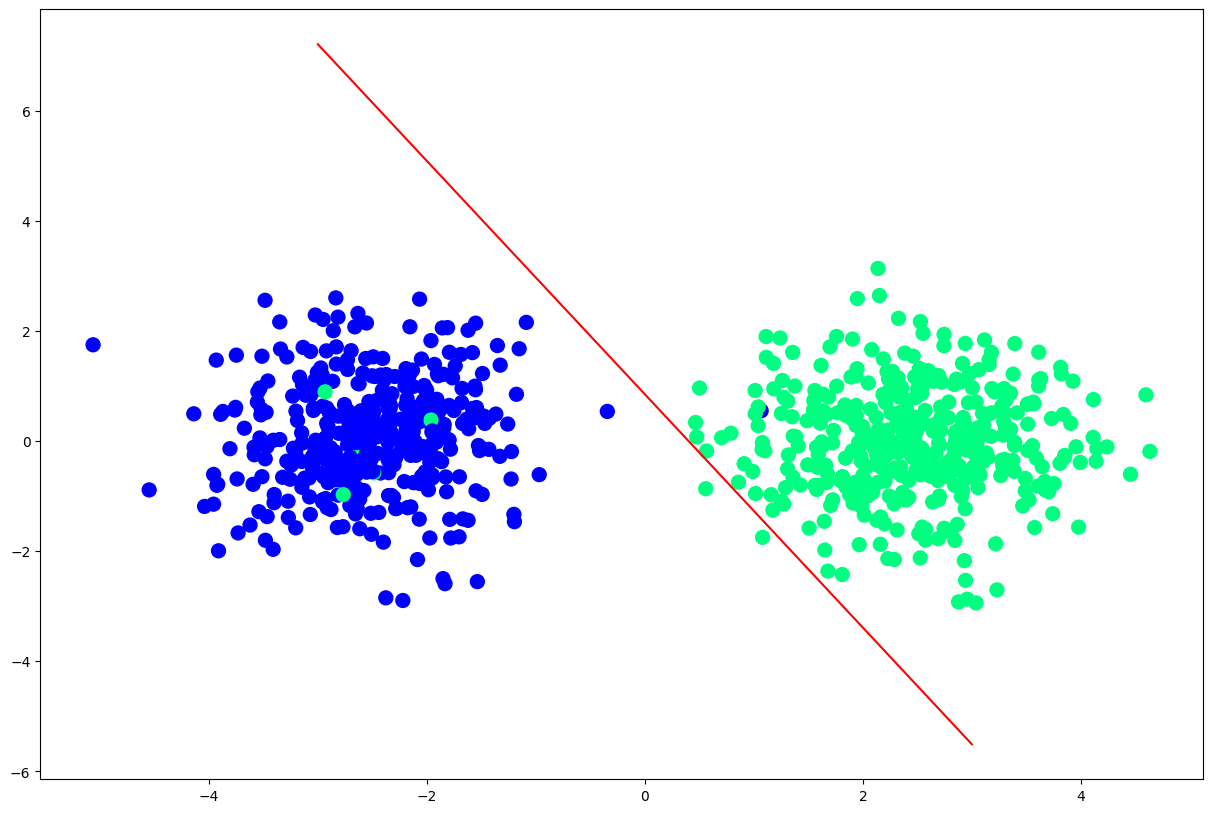

In [75]:
plt.figure(figsize=(15, 10))
plt.plot(x_input, y_input, color="r")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="winter", s=100)
plt.show()